In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import plotly.express as px
import json
from scipy.stats import linregress
import scipy.stats as st
import csv
import os
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
import seaborn as sns
import geopandas as gpd
import folium
import hvplot.pandas
from matplotlib.animation import FuncAnimation
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
from shapely.geometry import Point
file_to_output = os.path.join("project-1", "output.csv")

In [2]:
#url ="https://www.fema.gov/api/open/v2/DisasterDeclarationsSummaries"
#url= "https://www.fema.gov/api/open/v1/FemaWebDisasterSummaries"
url="https://www.fema.gov/api/open/v2/HazardMitigationGrantProgramDisasterSummaries"
filters2 = "$filter=declarationDate gt '2004-01-13T04:00:00.000Z' and (incidentType eq 'Hurricane' or incidentType eq 'Typhoon' or incidentType eq 'Fire' or incidentType eq 'Flood')" 


In [3]:
# Send a GET request to the API
#response = requests.get(url+'?'+filters1)
response = requests.get(f"{url}?{filters2}")

In [4]:
# Sample request (replace with your actual API URL)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON data
    data = response.json()
    
    disasters = data.get('HazardMitigationGrantProgramDisasterSummaries', [])
    Disaster_df = pd.DataFrame(disasters)
    Disaster_df = Disaster_df.iloc[:, [0, 1, 2, 3, 4, 5, 6, 8, 10, 13, 23, 24, 25, 26, 27, 28, 29, 31]]
    
    # Convert declarationDate to datetime
    Disaster_df['declarationDate'] = pd.to_datetime(Disaster_df['declarationDate'], errors='coerce')
    
    # Create new columns with the desired formats
    Disaster_df['formattedDate'] = Disaster_df['declarationDate'].dt.strftime('%B %Y')
    Disaster_df['formattedyear'] = Disaster_df['declarationDate'].dt.strftime('%Y')

    # Data Cleaning Steps

    # 1. Handle missing values
    Disaster_df = Disaster_df.dropna(subset=['declarationDate'])

    # 2. Remove duplicates
    Disaster_df = Disaster_df.drop_duplicates()

    # 3. Format data types (if needed)
    # Disaster_df['some_numeric_column'] = pd.to_numeric(Disaster_df['some_numeric_column'], errors='coerce')

    # 4. Filter out unnecessary data
    # Disaster_df = Disaster_df[Disaster_df['some_column'] == 'some_value']

    # 5. Rename columns for clarity
    Disaster_df.rename(columns={
        'column1': 'NewColumnName1',
        'column2': 'NewColumnName2',
        # Add more columns as needed
    }, inplace=True)

    # Save the cleaned DataFrame to a CSV file
    Disaster_df.to_csv('disaster_data_cleaned.csv', index=False)

    print("Data saved to disaster_data_cleaned.csv")
else:
    print(f"Error: {response.status_code}")
Disaster_df

Data saved to disaster_data_cleaned.csv


disasterNumber           declarationDate disasterType incidentType  \
0              4357 2018-03-02 00:00:00+00:00           DR    Hurricane   
1              5389 2021-06-06 00:00:00+00:00           FM         Fire   
2              1843 2009-06-11 00:00:00+00:00           DR        Flood   
3              4667 2022-08-26 00:00:00+00:00           DR        Flood   
4              4840 2024-10-25 00:00:00+00:00           DR        Flood   
..              ...                       ...          ...          ...   
828            5269 2018-08-11 00:00:00+00:00           FM         Fire   
829            4384 2018-08-17 00:00:00+00:00           DR        Flood   
830            5375 2020-09-26 00:00:00+00:00           FM         Fire   
831            5240 2018-06-08 00:00:00+00:00           FM         Fire   
832            5465 2023-05-10 00:00:00+00:00           FM         Fire   

                     title  region           state hmgpCloseoutStatus  \
0      TROPICAL STORM GITA       9  American Samoa               Open   
1           TELEGRAPH FIRE       9         Arizona               Open   
2    FLOODING AND ICE JAMS      10          Alaska             Closed   
3                 FLOODING      10          Alaska               Open   
4                 FLOODING       9         Arizona               Open   
..                     ...     ...             ...                ...   
828              HAWK FIRE      10      Washington               Open   
829               FLOODING      10      Washington             Closed   
830            MULLEN FIRE       8         Wyoming               Open   
831    SOLDIER CANYON FIRE       6      New Mexico               Open   
832         LAS TUSAS FIRE       6      New Mexico               Open   

       hmgpReconciliationDate hmgpPopEndDate  obligatedTotalAmount  \
0                        None           None            4070334.78   
1                        None           None                  0.00   
2    2016-09-28T00:00:00.000Z           None            3479110.00   
3                        None           None              74201.67   
4                        None           None                  0.00   
..                        ...            ...                   ...   
828                      None           None                  0.00   
829  2020-03-09T00:00:00.000Z           None                  0.00   
830                      None           None                  0.00   
831                      None           None                  0.00   
832                      None           None                  0.00   

     obligatedInitiativeAmount  obligatedPlanningAmount  \
0                     179830.8                 250290.0   
1                          0.0                      0.0   
2                          0.0                 166900.0   
3                          0.0                      0.0   
4                          0.0                      0.0   
..                         ...                      ...   
828                        0.0                      0.0   
829                        0.0                      0.0   
830                        0.0                      0.0   
831                        0.0                      0.0   
832                        0.0                      0.0   

     obligatedRegularAmount  obligatedRecipientAdmin  \
0                3165018.98                      0.0   
1                      0.00                      0.0   
2                3126359.00                      0.0   
3                  42000.00                      0.0   
4                      0.00                      0.0   
..                      ...                      ...   
828                    0.00                      0.0   
829                    0.00                      0.0   
830                    0.00                      0.0   
831                    0.00                      0.0   
832                    0.00                      0.0   

    

In [5]:
Disaster_df['incidentType'].value_counts()

incidentType
Fire         466
Flood        212
Hurricane    144
Typhoon       11
Name: count, dtype: int64

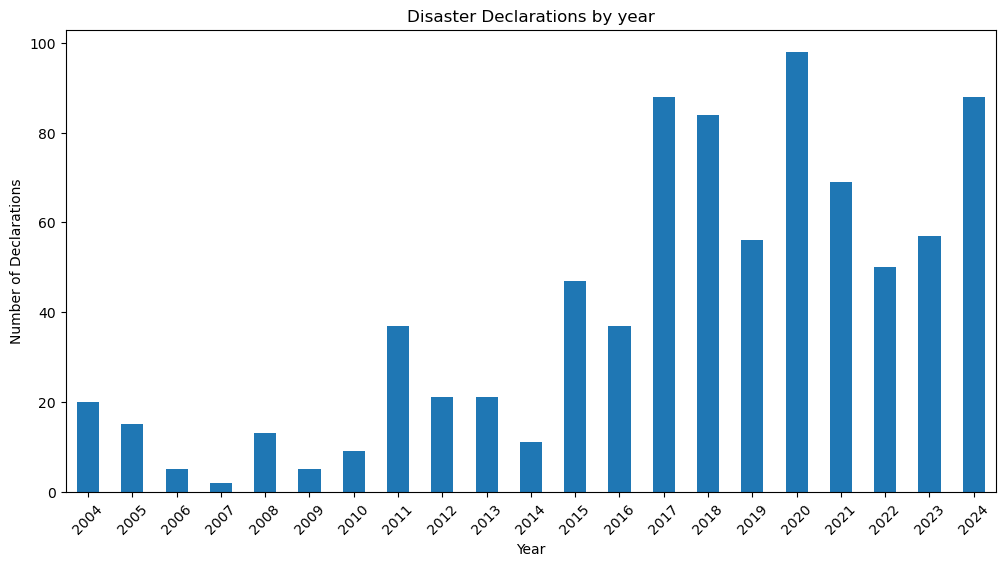

In [6]:
monthly_counts = Disaster_df['formattedyear'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='bar')
plt.title('Disaster Declarations by year')
plt.xlabel('Year')
plt.ylabel('Number of Declarations')
plt.xticks(rotation=45)
plt.show()

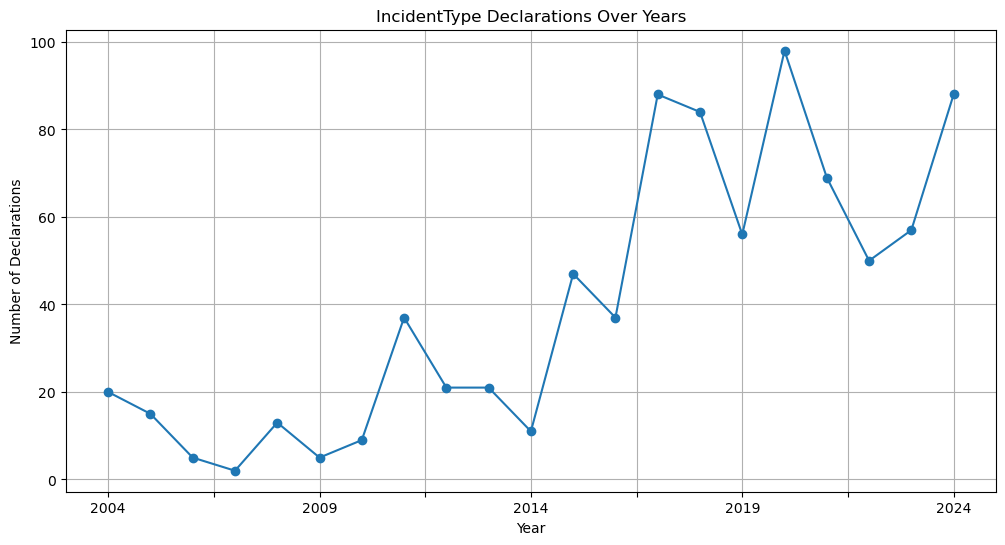

In [7]:
# Count disasters per year
yearly_counts = Disaster_df['formattedyear'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='line', marker='o')
plt.title('IncidentType Declarations Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Declarations')
plt.grid()
plt.show()

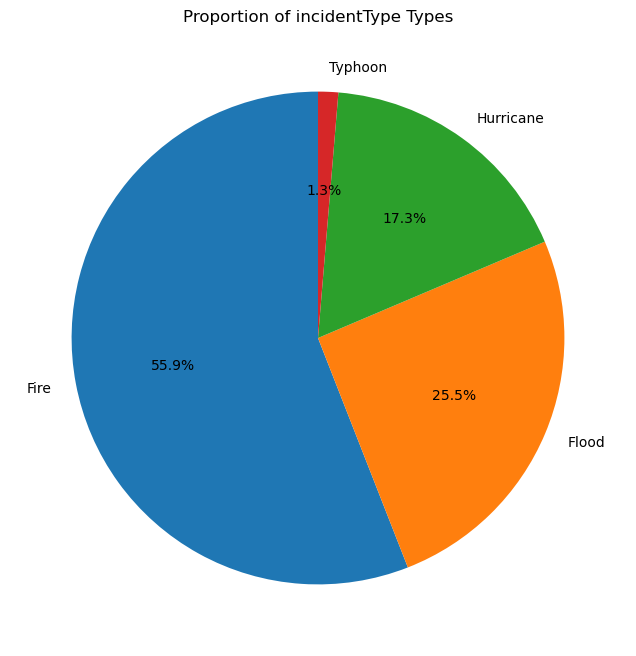

In [8]:
# Assuming you have a 'disasterType' column
disaster_type_counts = Disaster_df['incidentType'].value_counts()

# Plotting
plt.figure(figsize=(8, 8))
disaster_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proportion of incidentType Types')
plt.ylabel('')  # Hide the y-label
plt.show()

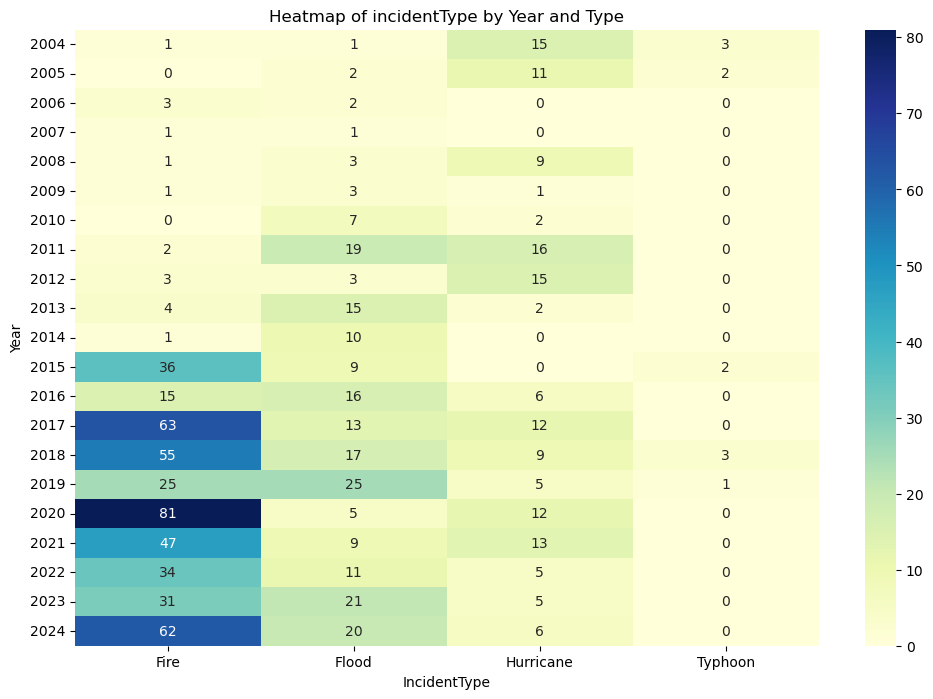

In [9]:
# Pivot table for heatmap
heatmap_data = Disaster_df.pivot_table(index='formattedyear', columns='incidentType', values='declarationDate', aggfunc='count', fill_value=0)

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of incidentType by Year and Type')
plt.xlabel('IncidentType')
plt.ylabel('Year')
plt.show()

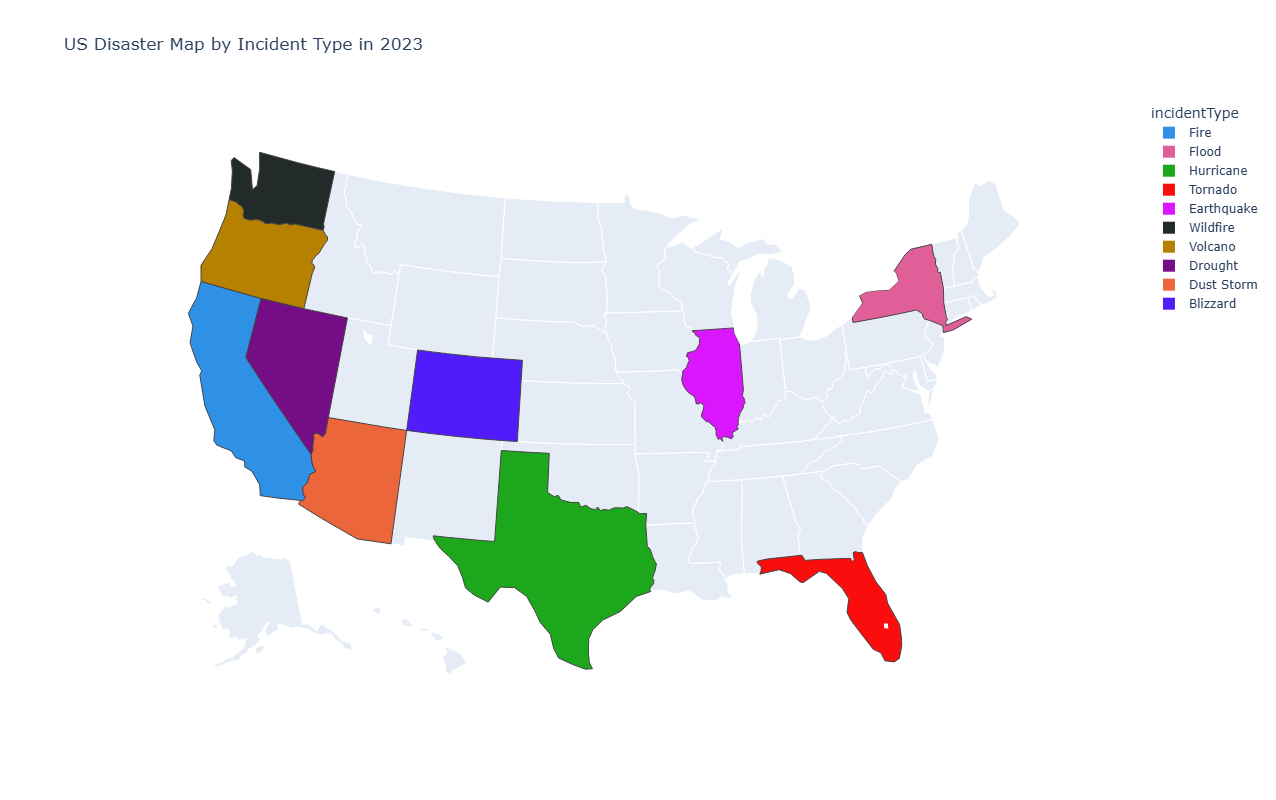

In [10]:

data = {'state': ['CA', 'NY', 'TX', 'FL', 'IL', 'WA', 'OR', 'NV', 'AZ', 'CO'],
        'incidentType': ['Fire', 'Flood', 'Hurricane', 'Tornado', 'Earthquake', 'Wildfire', 'Volcano', 'Drought', 'Dust Storm', 'Blizzard'],
        'declarationDate': ['2023-10-26', '2023-10-27', '2023-10-28', '2023-10-29', '2023-10-30', '2023-10-31', '2023-11-01', '2023-11-02', '2023-11-03', '2023-11-04']}
Disaster_df = pd.DataFrame(data)

fig = px.choropleth(Disaster_df, locations='state', locationmode="USA-states", 
                    color='incidentType',
                    scope="usa",
                    title='US Disaster Map by Incident Type in 2023',
                    hover_name='state', 
                    hover_data=['declarationDate', 'incidentType'],
                    color_discrete_sequence=px.colors.qualitative.Dark24
                   )

# Update the layout to show the colorbar even when zoomed in
#fig.update_layout(coloraxis_colorbar=dict(title='Incident Type', len=0.5))
fig.update_layout(
    coloraxis_colorbar=dict(title='Incident Type'),
    width=1200,  # Adjust width as needed
    height=800   # Adjust height as needed
)
#fig.write_html("2023disaster_map.html")
fig.write_image("2023_us_disaster_map.png")
fig.show()

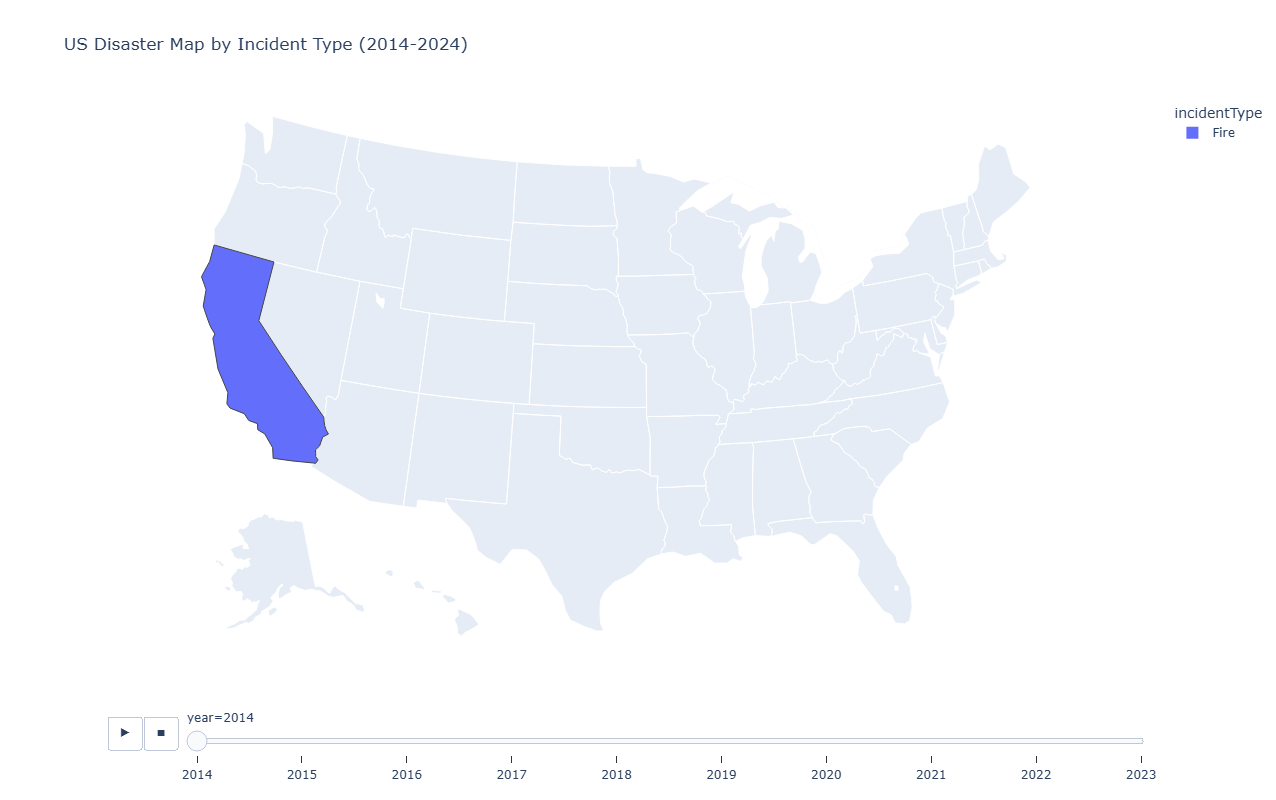

In [11]:
# Sample DataFrame (replace with your actual Disaster_df)
data = {'state': ['CA', 'NY', 'TX', 'FL', 'IL', 'WA', 'OR', 'NV', 'AZ', 'CO'],
        'incidentType': ['Fire', 'Flood', 'Hurricane', 'Tornado', 'Earthquake', 'Wildfire', 'Volcano', 'Drought', 'Dust Storm', 'Blizzard'],
        'declarationDate': ['2023-10-26', '2023-10-27', '2023-10-28', '2023-10-29', '2023-10-30', '2023-10-31', '2023-11-01', '2023-11-02', '2023-11-03', '2023-11-04'],
        'year': [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]} # Added a 'year' column
Disaster_df = pd.DataFrame(data)

# Create the choropleth map
fig = px.choropleth(Disaster_df, locations='state', locationmode="USA-states", 
                    color='incidentType',
                    animation_frame="year", # Animate by year
                    scope="usa",
                    title='US Disaster Map by Incident Type (2014-2024)',
                    hover_name='state', 
                    hover_data=['incidentType', 'declarationDate'])

# Save the animation as a video file (e.g., MP4)
fig.write_html("disaster_map.html") # Save as HTML first
# If you have imageio-ffmpeg installed, you can save directly to MP4
# fig.write_videofile("disaster_map.mp4", fps=1) # Adjust fps as needed

fig.update_layout(
    coloraxis_colorbar=dict(title='Incident Type'),
    width=1200,  # Adjust width as needed
    height=800   # Adjust height as needed
)


fig.show()

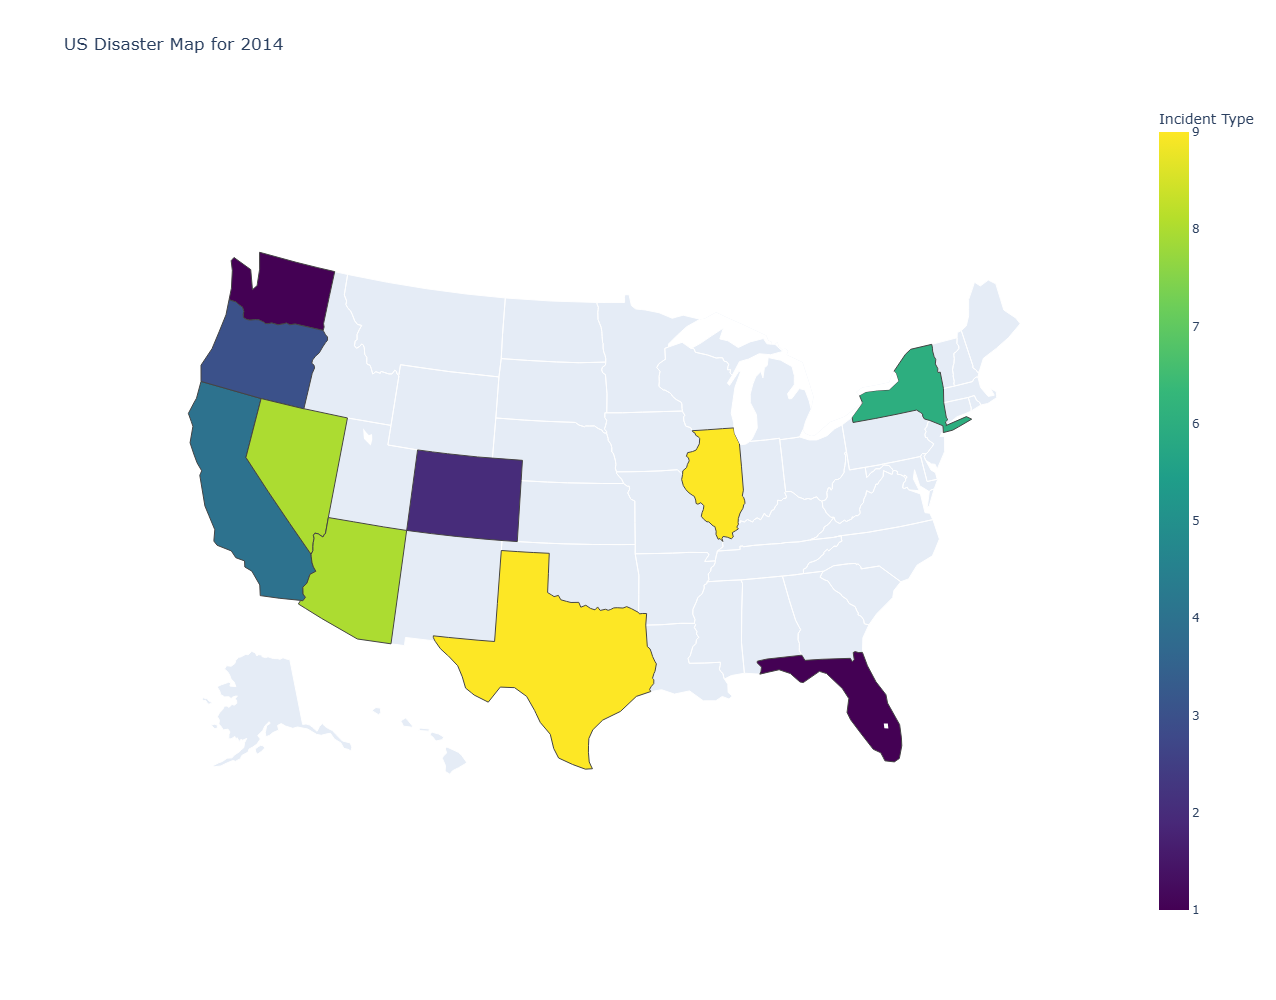

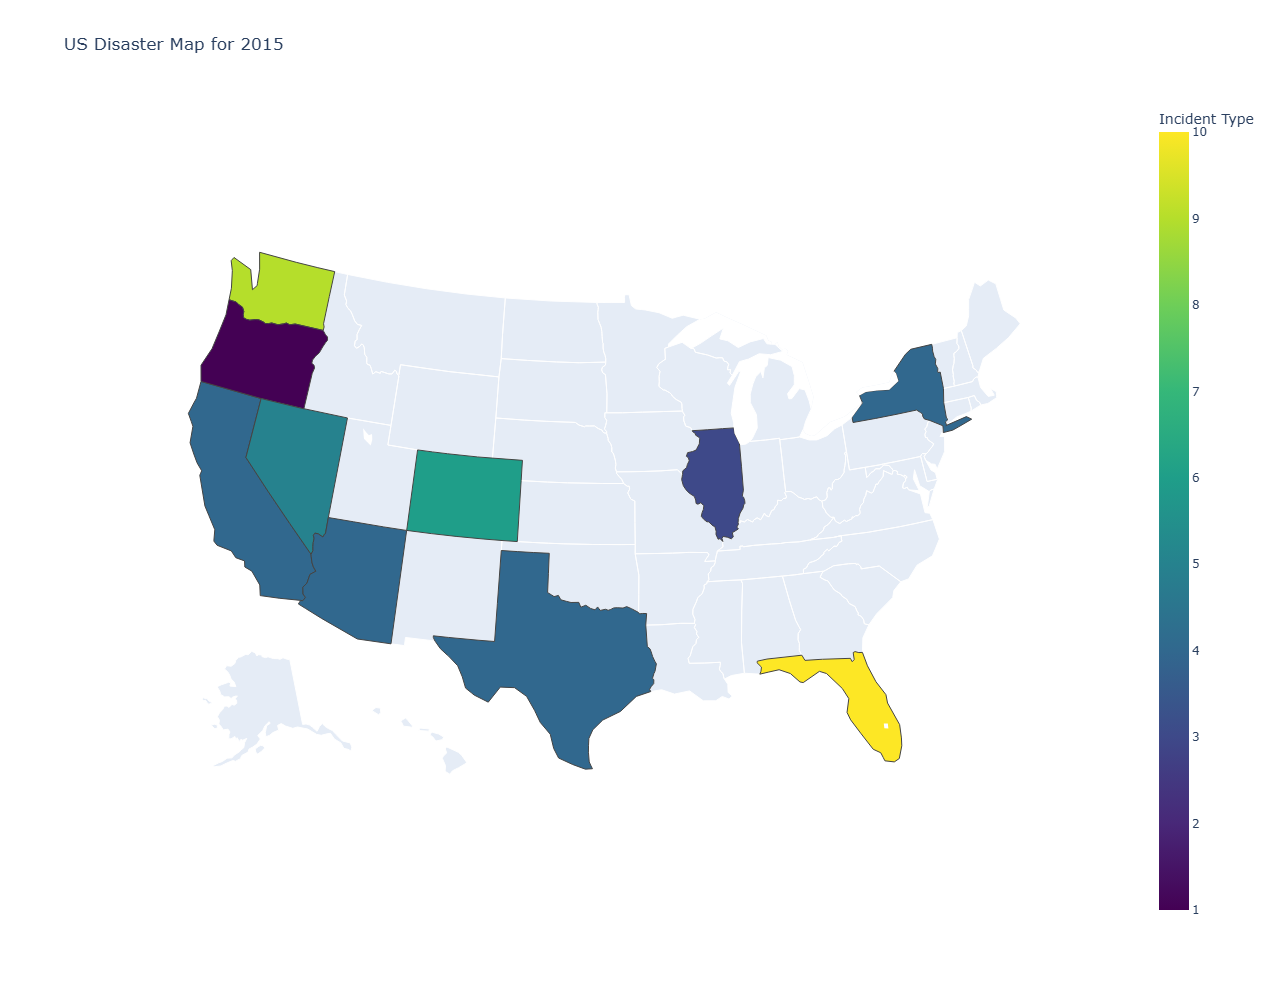

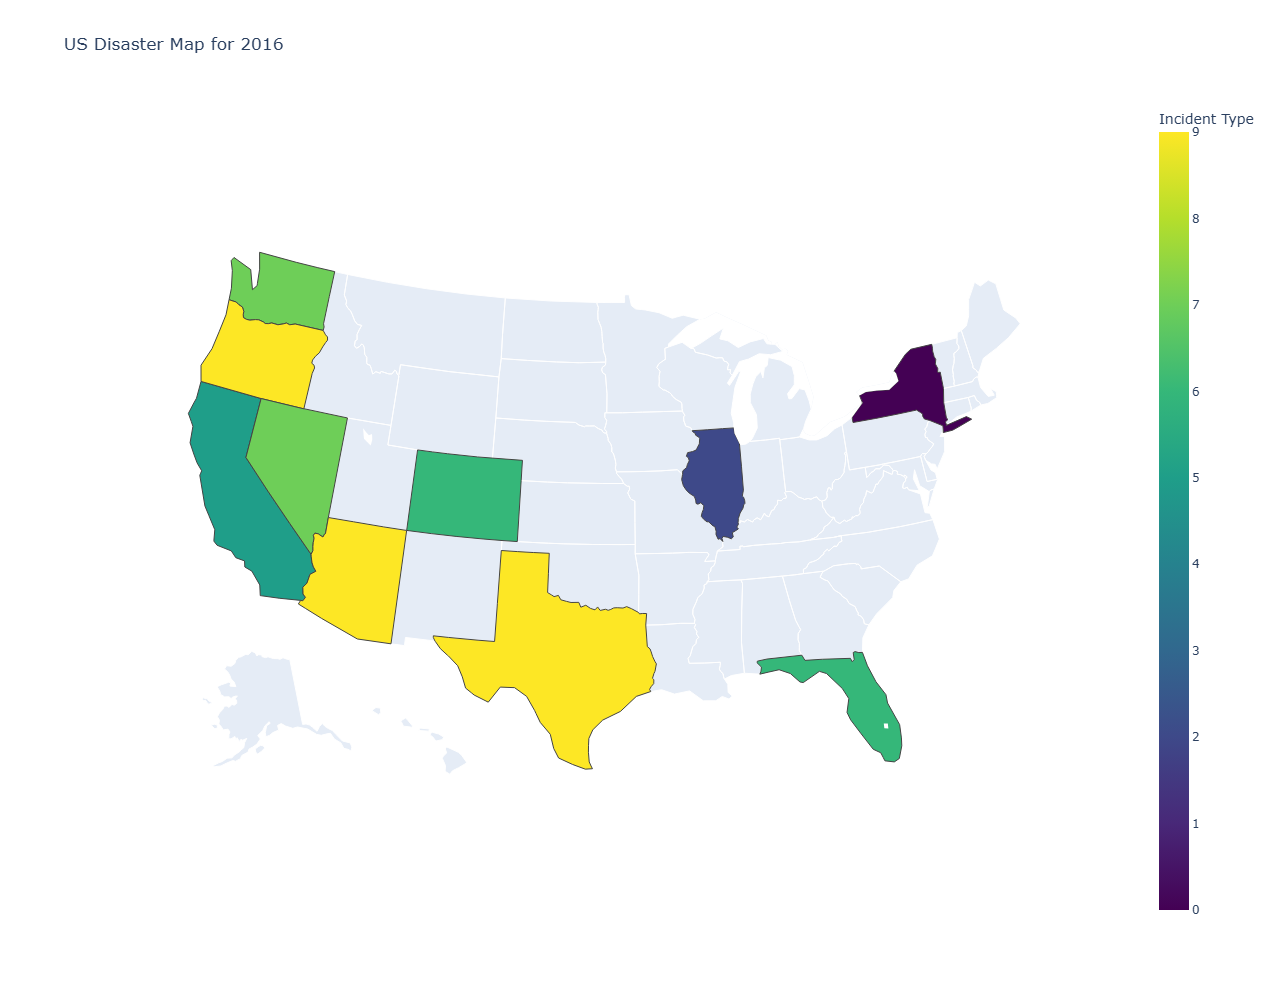

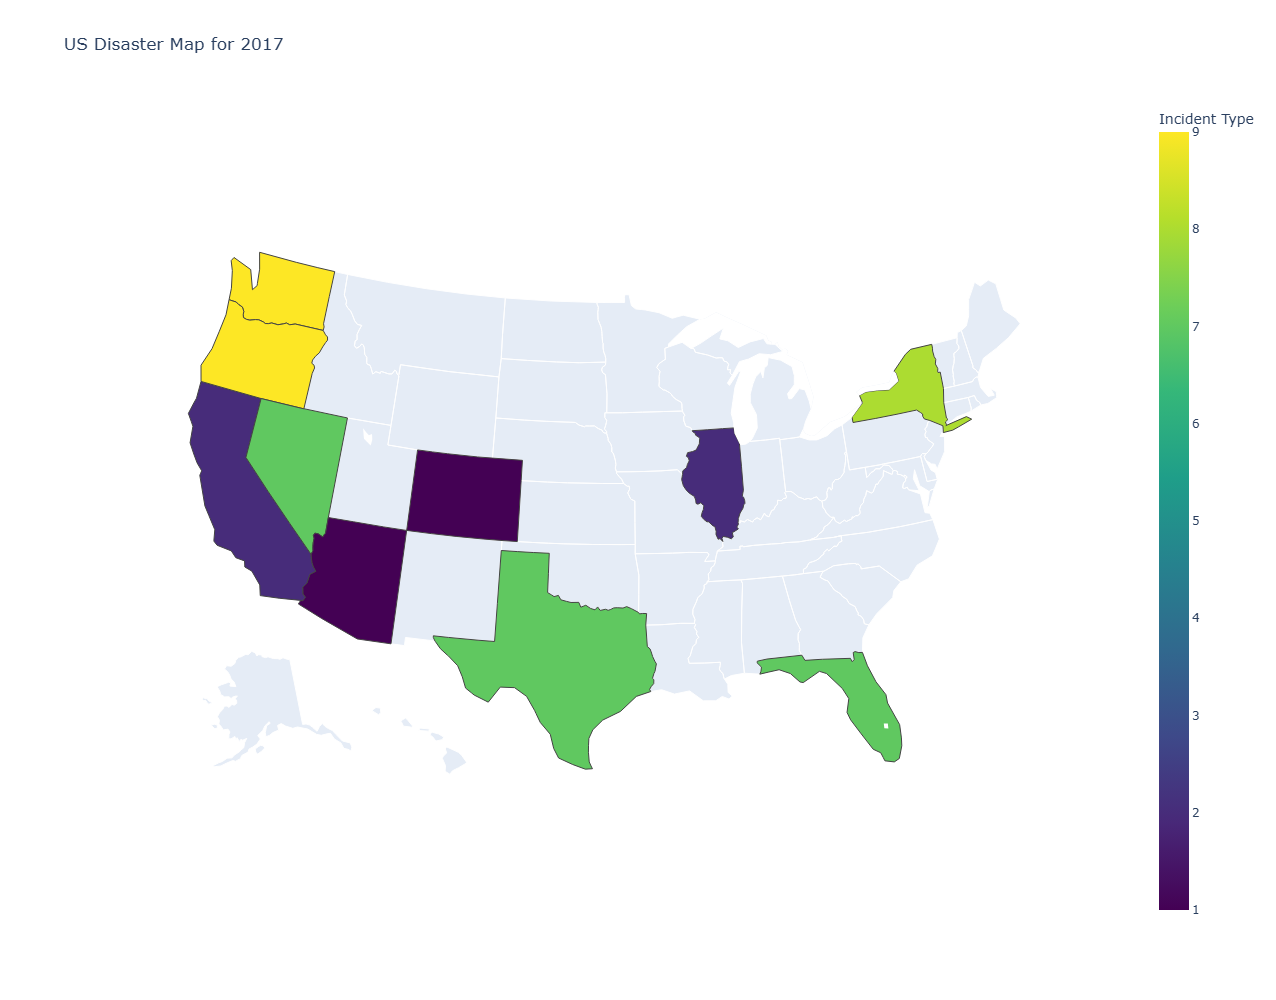

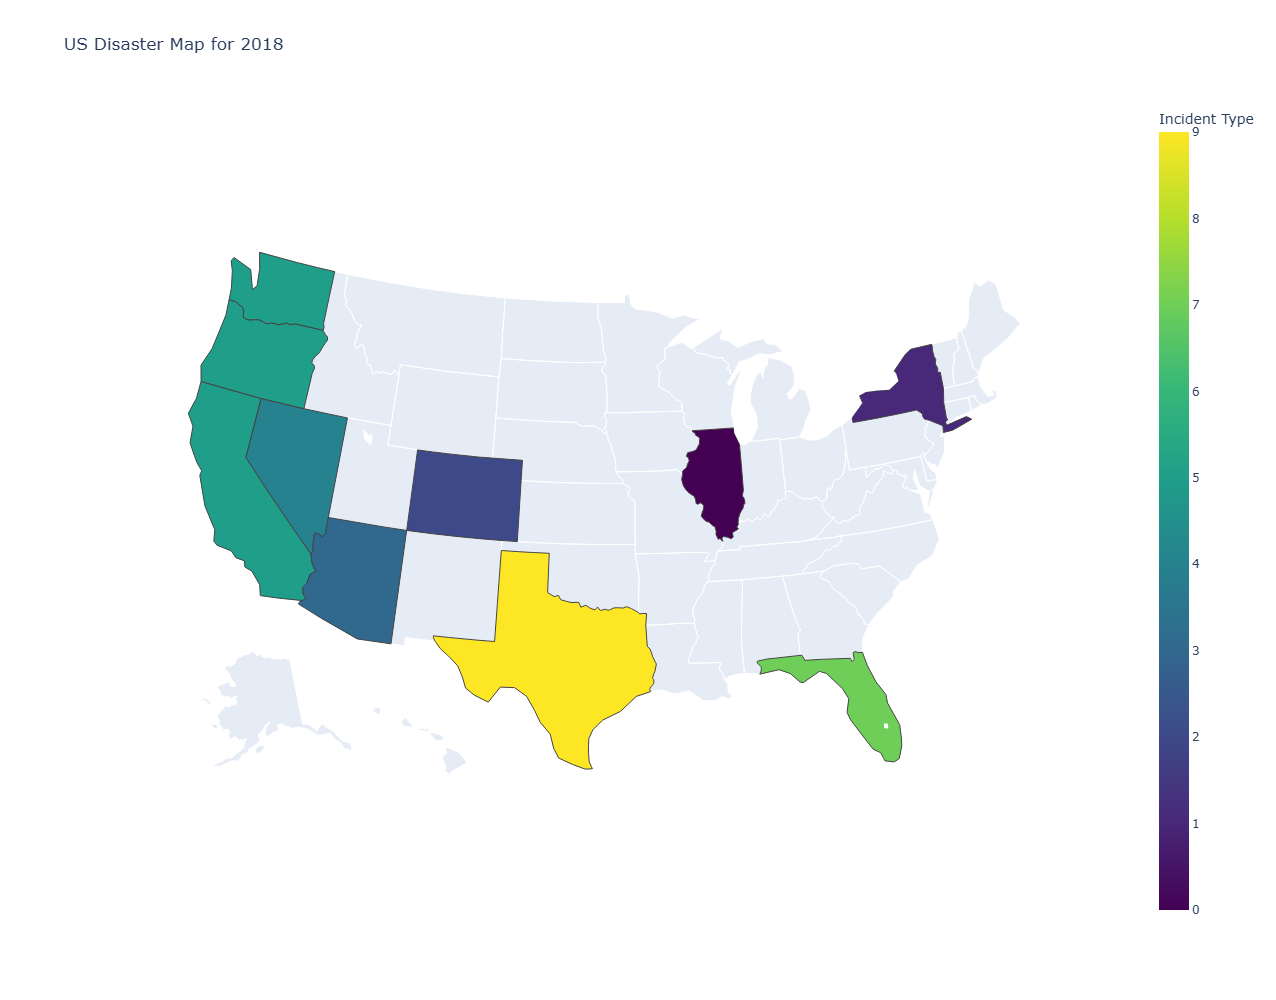

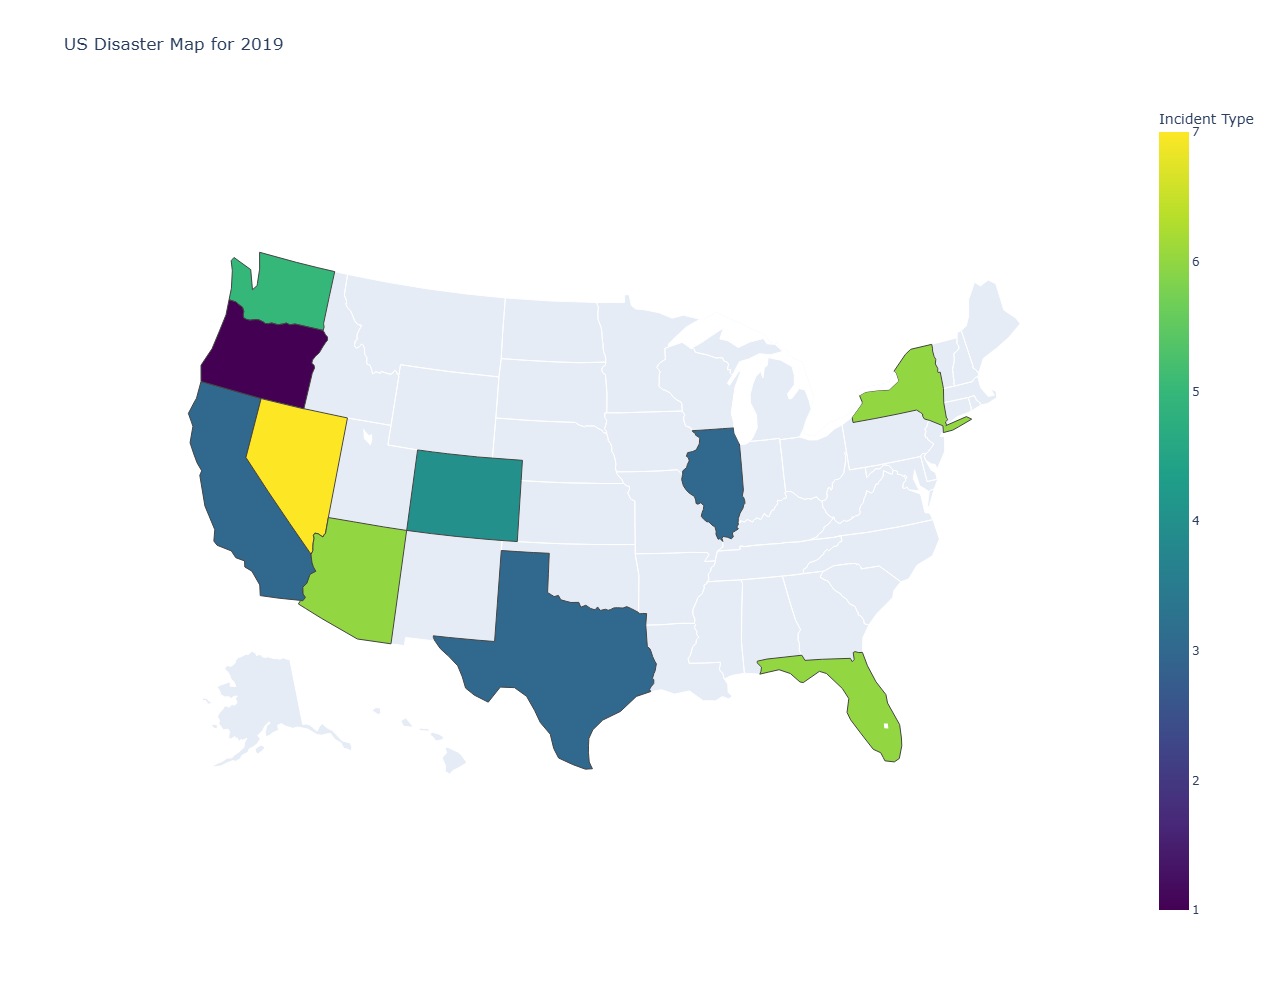

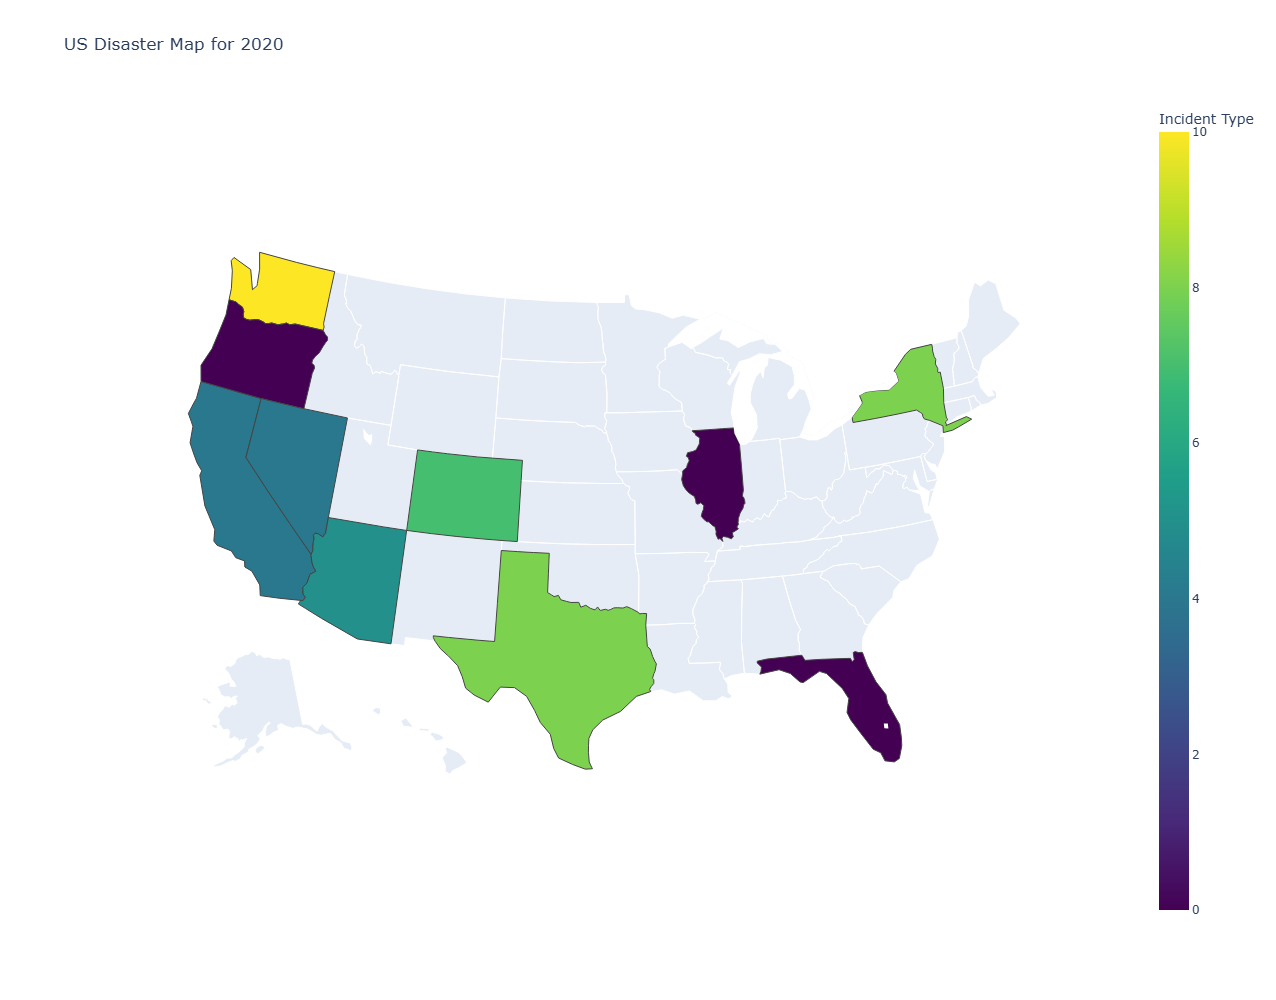

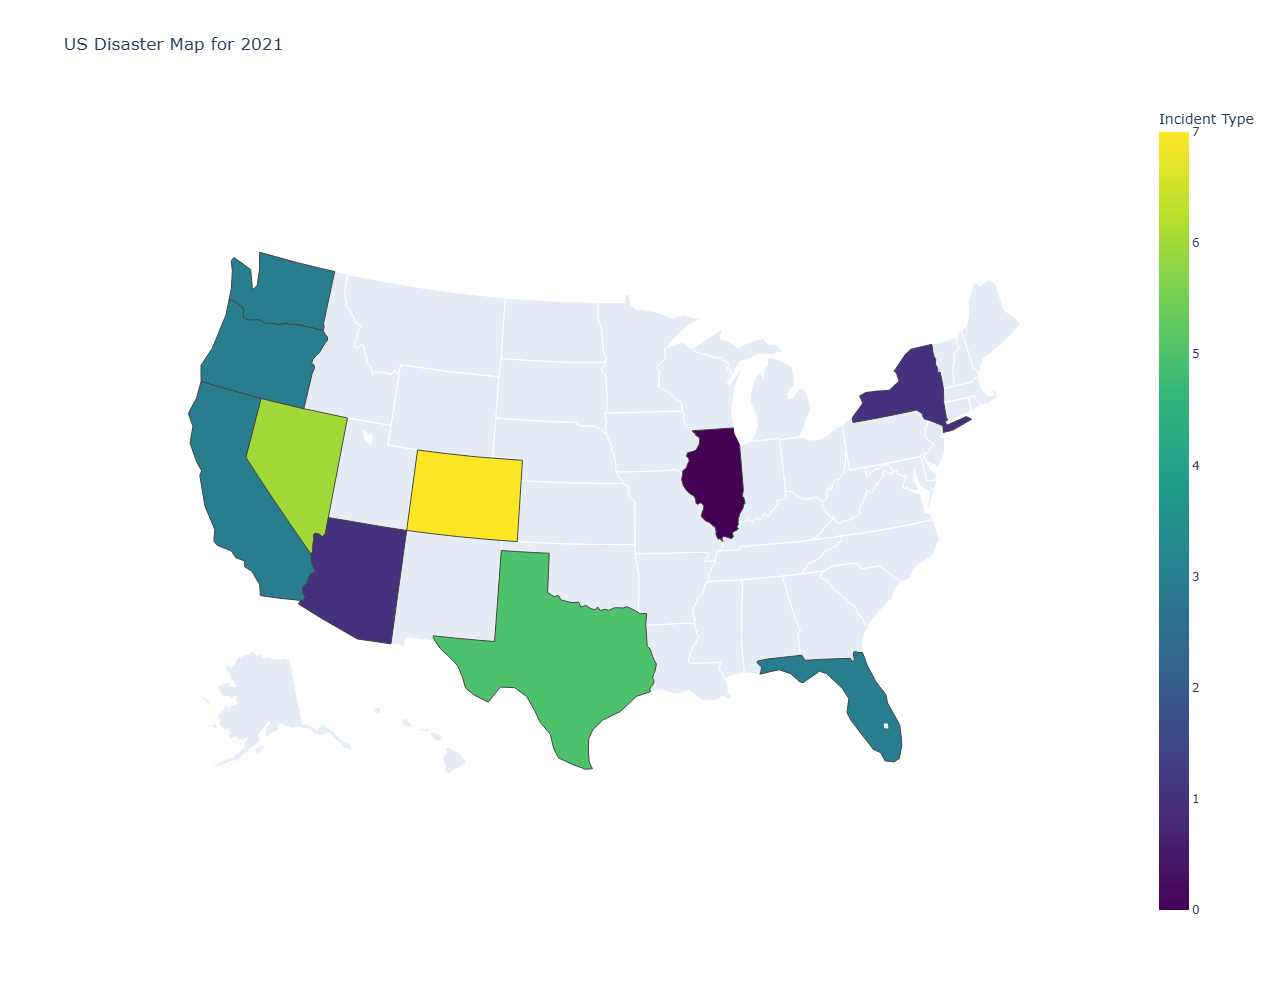

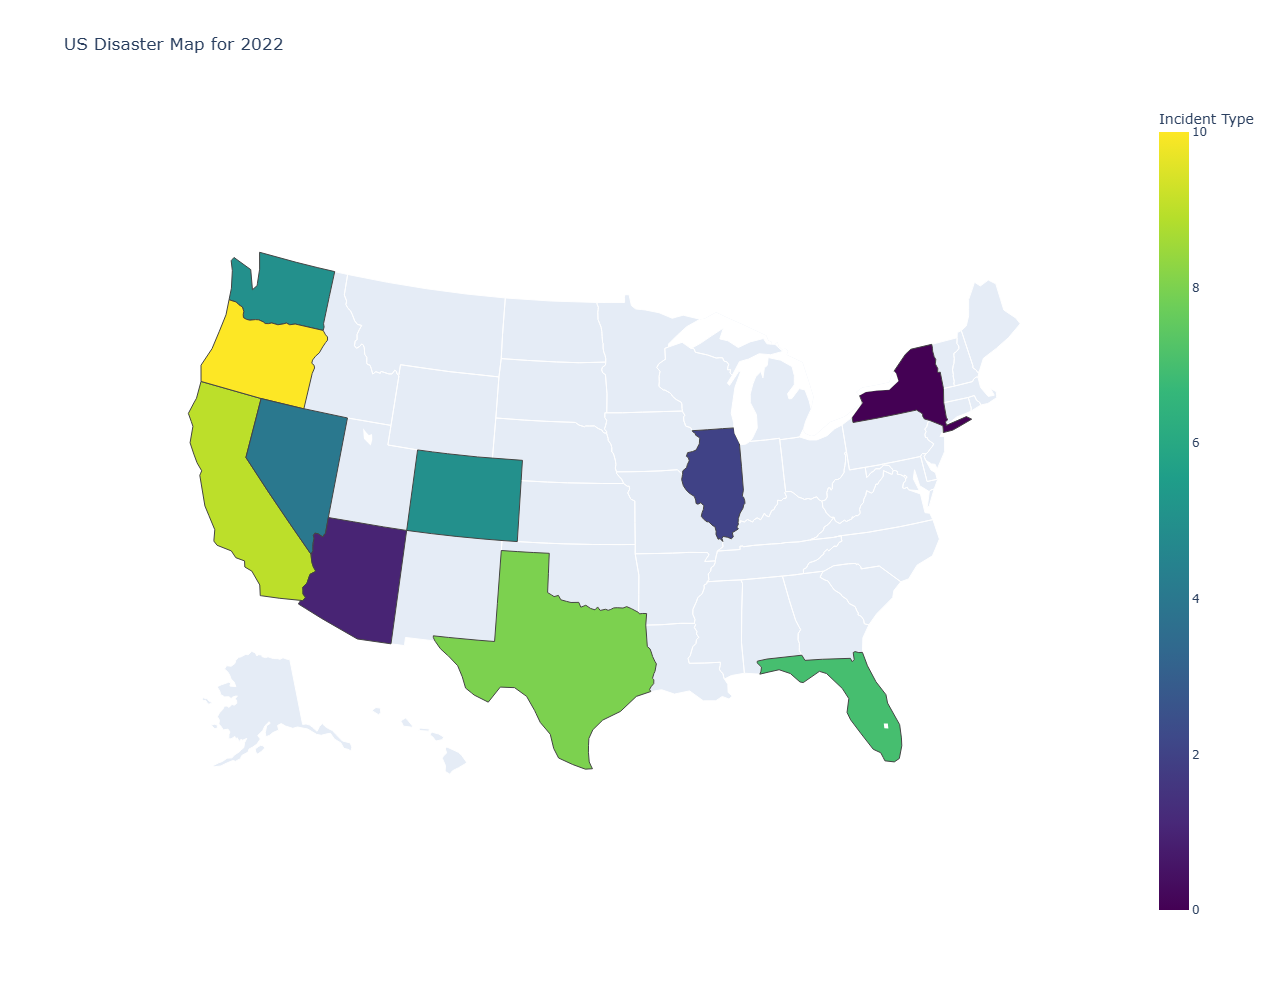

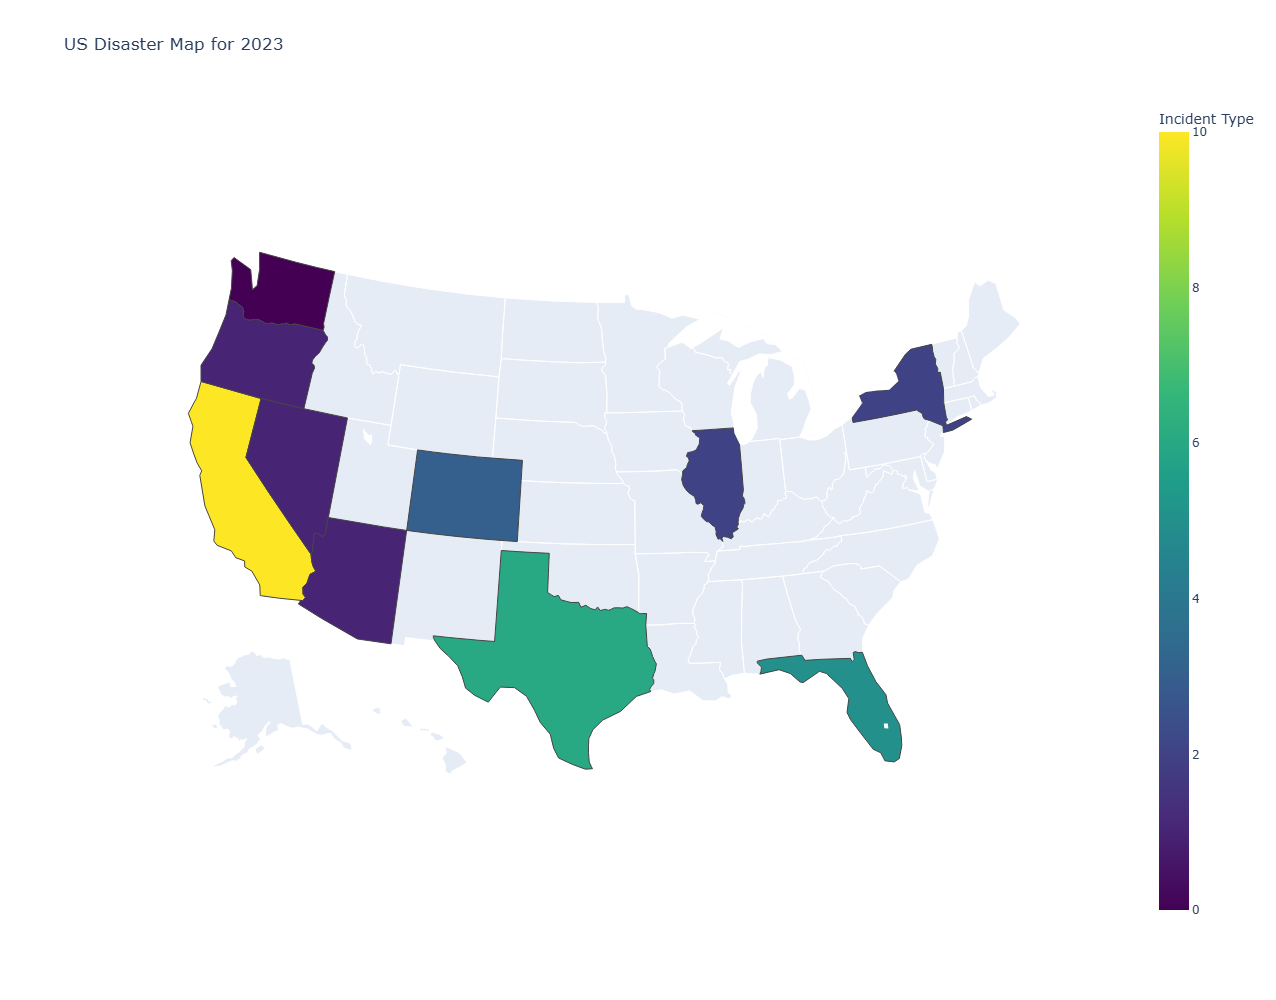

In [12]:
data = {'state': ['CA', 'NY', 'TX', 'FL', 'IL', 'WA', 'OR', 'NV', 'AZ', 'CO'],
        'incidentType': ['Fire', 'Flood', 'Hurricane', 'Tornado', 'Earthquake', 'Wildfire', 'Volcano', 'Drought', 'Dust Storm', 'Blizzard'],
        'declarationDate': ['2023-10-26', '2023-10-27', '2023-10-28', '2023-10-29', '2023-10-30', '2023-10-31', '2023-11-01', '2023-11-02', '2023-11-03', '2023-11-04']}
Disaster_df = pd.DataFrame(data)

# Create a list of years from 2014 to 2025
years = list(range(2014, 2024))

# Assuming you want to create a map for each year, you need data for each year.
# Since the sample data doesn't have this, let's create dummy data.
# Replace this with your actual data loading and processing.

# Create dummy data for the years (replace with your actual data)
import random
for year in years:
  Disaster_df[str(year)] = [random.randint(0, 10) for _ in range(len(Disaster_df))]

#Now iterate through the years and create choropleth maps
for year in years:
  fig = px.choropleth(Disaster_df, locations='state', locationmode="USA-states", 
                    color=str(year),
                    scope="usa",
                    title=f'US Disaster Map for {year}',
                    hover_name='state', 
                    hover_data=['incidentType', 'declarationDate'],
                    color_continuous_scale="Viridis", # Optional: customize colors
                   )
  fig.update_layout(
    coloraxis_colorbar=dict(title='Incident Type'),
    width=1600,  # Increased width
    height=1000   # Increased height
    )

  fig.show()

In [13]:
# Load the dataframe.
Disaster_df = pd.read_csv('disaster_data_cleaned.csv')

# Group data by incident type and count the number of fields for each.
incident_field_counts = Disaster_df.groupby('incidentType').count()

# Display or further process the field counts.
incident_field_counts

disasterNumber  declarationDate  disasterType  title  region  \
incidentType                                                                 
Fire                     466              466           466    466     466   
Flood                    212              212           212    212     212   
Hurricane                144              144           144    144     144   
Typhoon                   11               11            11     11      11   

              state  hmgpCloseoutStatus  hmgpReconciliationDate  \
incidentType                                                      
Fire            466                 466                      65   
Flood           212                 212                      90   
Hurricane       144                 144                      65   
Typhoon          11                  11                       6   

              hmgpPopEndDate  obligatedTotalAmount  obligatedInitiativeAmount  \
incidentType                                                                    
Fire                       1                   466                        466   
Flood                     14                   212                        212   
Hurricane                 13                   144                        144   
Typhoon                    0                    11                         11   

              obligatedPlanningAmount  obligatedRegularAmount  \
incidentType                                                    
Fire                              466                     466   
Flood                             212                     212   
Hurricane                         144                     144   
Typhoon                            11                      11   

              obligatedRecipientAdmin  obligatedSubrecipientAdmin  \
incidentType                                                        
Fire                              466                         466   
Flood                             212                         212   
Hurricane                         144                         144   
Typhoon                            11                          11   

              obligatedRecipientMgmtAmt  pendingProjectsQuantity  \
incidentType                                                       
Fire                                466                      154   
Flood                               212                      180   
Hurricane                           144                      135   
Typhoon                              11                       11   

              formattedDate  formattedyear  
incidentType                                
Fire                    466            466  
Flood                   212            212  
Hurricane               144            144  
Typhoon                  11             11

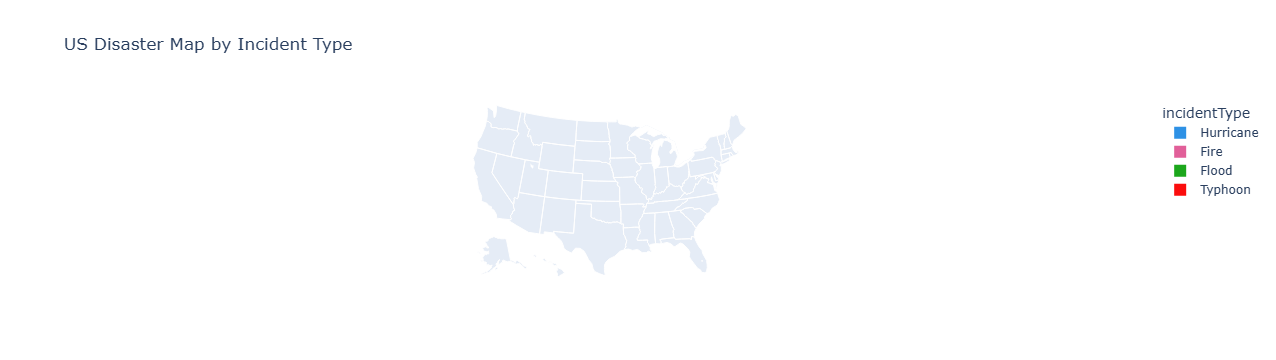

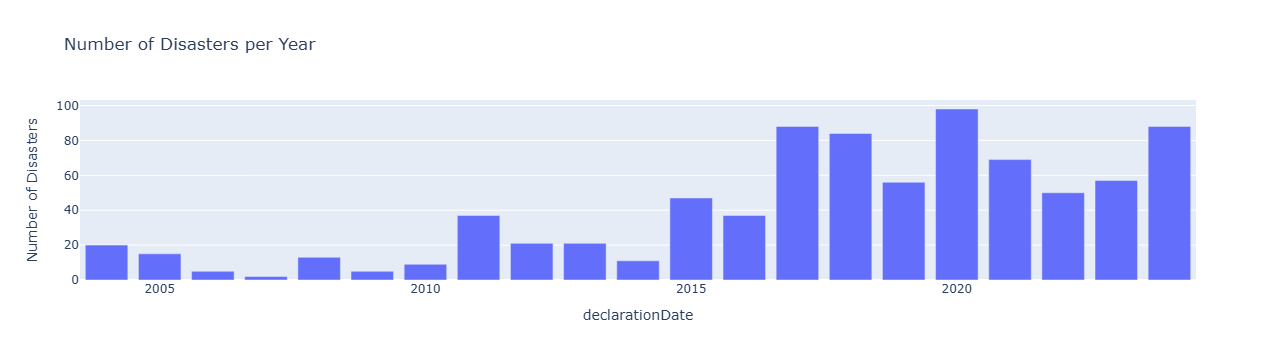

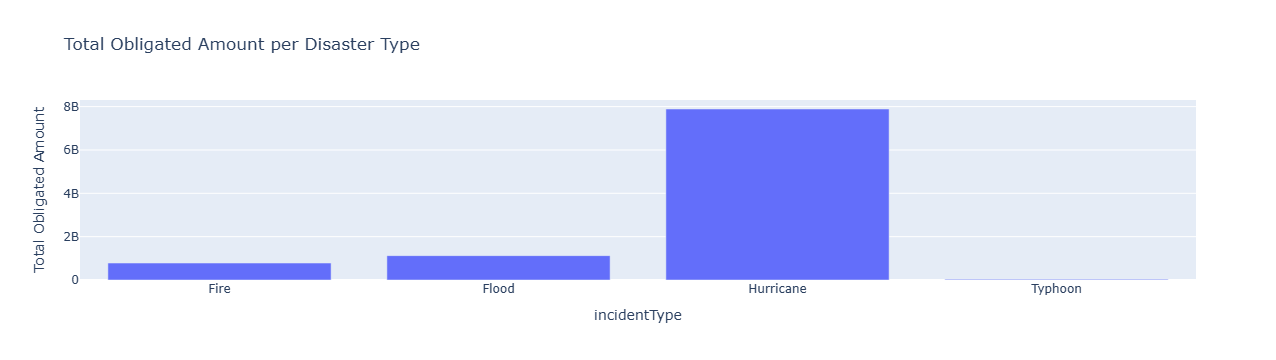

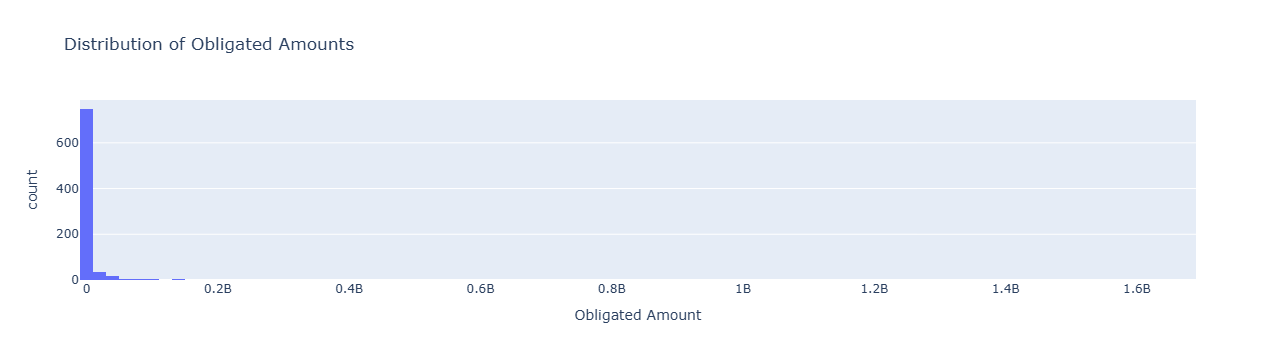

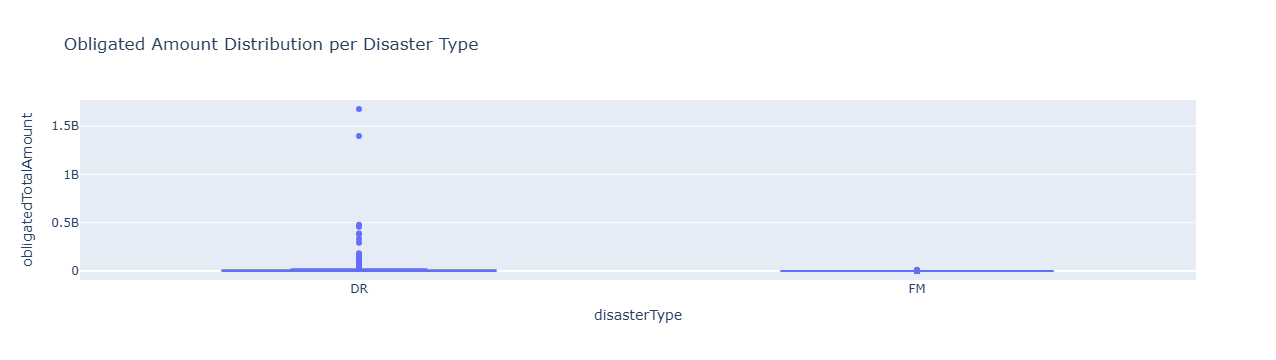

In [14]:
# Load the dataframe.
Disaster_df = pd.read_csv('disaster_data_cleaned.csv')

# Convert 'declarationDate' to datetime objects
Disaster_df['declarationDate'] = pd.to_datetime(Disaster_df['declarationDate'])

# Analysis 1: Choropleth map of incident types by state
fig = px.choropleth(Disaster_df, locations='state', locationmode="USA-states",
                    color='incidentType',
                    scope="usa",
                    title='US Disaster Map by Incident Type',
                    hover_name='state',
                    hover_data=['declarationDate', 'incidentType'],
                    color_discrete_sequence=px.colors.qualitative.Dark24
                   )
fig.show()


# Analysis 2:  Number of disasters per year
disaster_counts_per_year = Disaster_df.groupby(Disaster_df['declarationDate'].dt.year)['disasterNumber'].count()
fig = px.bar(disaster_counts_per_year, x=disaster_counts_per_year.index, y='disasterNumber',
             labels={'disasterNumber':'Number of Disasters', 'index':'Year'},
             title='Number of Disasters per Year')
fig.write_image("Number of Disasters per Year.png")
fig.show()


# Analysis 3: Total obligated amount per disaster type
obligated_amount_per_type = Disaster_df.groupby('incidentType')['obligatedTotalAmount'].sum()
fig = px.bar(obligated_amount_per_type, x=obligated_amount_per_type.index, y='obligatedTotalAmount',
             labels={'obligatedTotalAmount': 'Total Obligated Amount', 'index':'Disaster Type'},
             title='Total Obligated Amount per Disaster Type')
fig.write_image("Total Obligated Amount per Disaster Type.png")
fig.show()

# Analysis 4:  Distribution of obligated amounts
fig = px.histogram(Disaster_df, x='obligatedTotalAmount',
                   title='Distribution of Obligated Amounts',
                   labels={'obligatedTotalAmount': 'Obligated Amount'})
fig.write_image("Distribution of Obligated Amounts.png")
fig.show()

# Analysis 5:  Relationship between obligated amount and disaster type (box plot)
fig = px.box(Disaster_df, x='disasterType', y='obligatedTotalAmount',
             title='Obligated Amount Distribution per Disaster Type')
fig.show()